In [1]:
import platform
print('Python Version = ',platform.python_version())

Python Version =  3.5.2


In [2]:
import dlib
import face_alignment
import cv2
import numpy as np
import tqdm

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import time

In [4]:
def plot_2D_landmarks(image, landmarks, save_or_show='show', fig_name='a.png'):
    import matplotlib.pyplot as plt
    # ONLY plt.imshow!! Need to execute plt.show() separately!
    frame = np.array(image)
    if frame.max() <= 1.:
        max_value = 1
    else:
        max_value = 255
    face_width = landmarks[:, 0].max() - landmarks[:, 0].min()
    lm_width = np.ceil(face_width / 60)
    for l, landmark in enumerate(landmarks):
        frame[int(landmark[1]-lm_width):int(landmark[1]+lm_width), int(landmark[0]-lm_width):int(landmark[0]+lm_width)] = max_value
    if save_or_show == 'show':
        plt.imshow(frame)
    elif save_or_show == 'save':
        imageio.imwrite(fig_name, frame)


def plot_3D_landmarks(image, landmarks, save_or_show='show', fig_name='a.png'):
    import matplotlib.pyplot as plt
    #TODO: Make this nice
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=plt.figaspect(.5))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(image)
    ax.plot(landmarks[0:17, 0], landmarks[0:17, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[17:22, 0], landmarks[17:22, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[22:27, 0], landmarks[22:27, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[27:31, 0], landmarks[27:31, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[31:36, 0], landmarks[31:36, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[36:42, 0], landmarks[36:42, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[42:48, 0], landmarks[42:48, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[48:60, 0], landmarks[48:60, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.plot(landmarks[60:68, 0], landmarks[60:68, 1], marker='o', markersize=2, linestyle='-', color='w', lw=2)
    ax.axis('off')
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    surf = ax.scatter(landmarks[:, 0]*1.2, landmarks[:,1], landmarks[:, 2], c="cyan", alpha=1.0, edgecolor='b')
    ax.plot3D(landmarks[:17, 0]*1.2, landmarks[:17,1], landmarks[:17,2], color='blue' )
    ax.plot3D(landmarks[17:22, 0]*1.2, landmarks[17:22, 1], landmarks[17:22, 2], color='blue')
    ax.plot3D(landmarks[22:27, 0]*1.2, landmarks[22:27, 1], landmarks[22:27, 2], color='blue')
    ax.plot3D(landmarks[27:31, 0]*1.2, landmarks[27:31, 1], landmarks[27:31, 2], color='blue')
    ax.plot3D(landmarks[31:36, 0]*1.2, landmarks[31:36, 1], landmarks[31:36, 2], color='blue')
    ax.plot3D(landmarks[36:42, 0]*1.2, landmarks[36:42, 1], landmarks[36:42, 2], color='blue')
    ax.plot3D(landmarks[42:48, 0]*1.2, landmarks[42:48, 1], landmarks[42:48, 2], color='blue')
    ax.plot3D(landmarks[48:60, 0]*1.2, landmarks[48:60, 1], landmarks[48:60, 2], color='blue' )
    ax.plot3D(landmarks[60:, 0]*1.2, landmarks[60:, 1], landmarks[60:, 2], color='blue' )
    ax.view_init(elev=90., azim=90.)
    ax.set_xlim(ax.get_xlim()[::-1])
    if save_or_show == 'show':
        plt.show()
        plt.close()
    elif save_or_show == 'save':
        plt.savefig(fig_name)
plt.close()

In [5]:
im0 = cv2.resize(cv2.cvtColor(cv2.imread('img0.png'), cv2.COLOR_BGR2RGB),(224,224))
im1 = cv2.resize(cv2.cvtColor(cv2.imread('img1.png'), cv2.COLOR_BGR2RGB),(224,224))

In [6]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, enable_cuda=True, flip_input=False)

fa_im0 = fa.get_landmarks(im0)[0]
fa_im1 = fa.get_landmarks(im1)[0]

In [7]:
src_img = im0
src_points = fa_im0[:36, :2]
dst_img = im1
dst_points = fa_im1[:36, :2]
h, status = cv2.findHomography(src_points, dst_points)
warped_img_0_to_1 = cv2.warpPerspective(src_img, h, (224, 224))

In [8]:
warped_img_0_to_1.shape


(224, 224, 3)

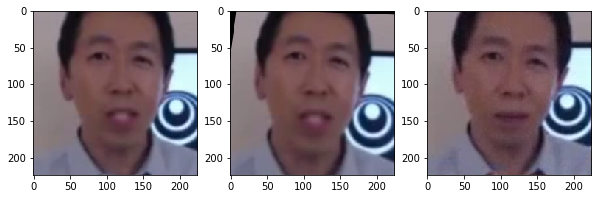

In [9]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(src_img)
plt.subplot(132)
plt.imshow(warped_img_0_to_1)
plt.subplot(133)
plt.imshow(dst_img)

In [10]:
lm_w_0_to_1 = np.round(fa.get_landmarks(warped_img_0_to_1)[0]).astype('int')

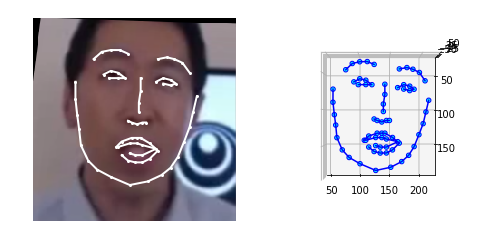

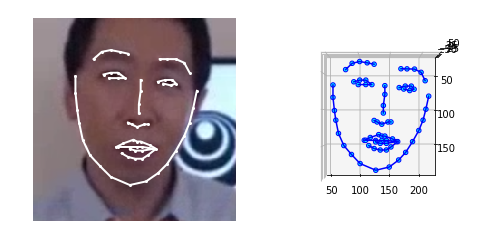

In [11]:
plot_3D_landmarks(warped_img_0_to_1, lm_w_0_to_1)
plot_3D_landmarks(im1, fa_im1)

In [12]:
lip_center_src=np.mean([lm_w_0_to_1[62][:2],lm_w_0_to_1[66][:2]],0)
lc_src=np.round(lip_center_src).astype('int')
print(np.round(lip_center_src).astype('int'))

lip_center_dst=np.mean([fa_im1[62][:2],fa_im1[66][:2]],0)
lc_dst=np.round(lip_center_dst).astype('int')
print(np.round(lip_center_dst).astype('int'))

lc_src[0]

[113 144]
[113 144]


113

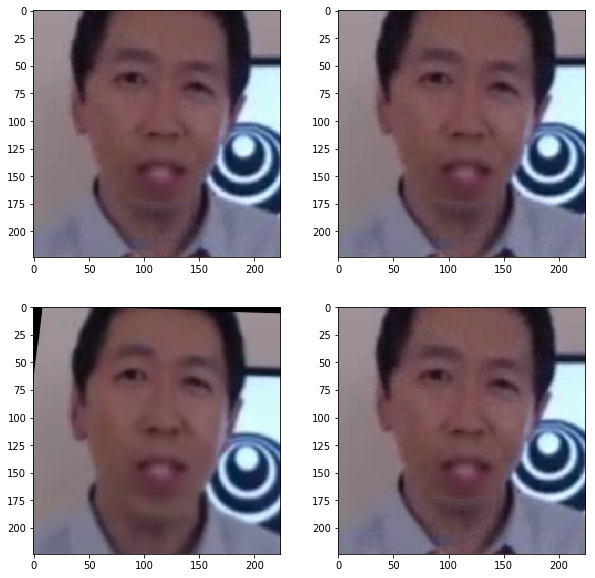

In [13]:
im1 = cv2.resize(cv2.cvtColor(cv2.imread('img1.png'), cv2.COLOR_BGR2RGB),(224,224))
im_trans=im1
im_trans[lc_dst[1]-30:lc_dst[1]+30,lc_dst[0]-30:lc_dst[0]+30]= warped_img_0_to_1[lc_src[1]-30:lc_src[1]+30,lc_src[0]-30:lc_src[0]+30]
# im_trans[144-30:144+30,113-30:113+30]=0
# im_trans[lm_w_0_to_1[62][1], lm_w_0_to_1[62][0]]=0

#print(im_trans[128-20:128+60,129-20:129+20].shape,warped_img_0_to_1[126-20:126+20,132-20:132+20].shape)
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(im_trans)
plt.subplot(222)
plt.imshow(im1)
plt.subplot(223)
plt.imshow(warped_img_0_to_1)
plt.subplot(224)
plt.imshow(im1)

In [14]:
def vid2img(filename):
    cap=cv2.VideoCapture(filename)
    success,frame=cap.read()
    allImg=[]
    while(success):
        allImg.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        success,frame=cap.read()
    return allImg

In [36]:
def face_align(src_img,dst_img,face_alignment_obj=fa):
    img0 = cv2.resize(src_img,(224,224))
    img1 = dst_img
    h,w,d = dst_img.shape
    fa_img0 = face_alignment_obj.get_landmarks(img0)[0]
    fa_img1 = face_alignment_obj.get_landmarks(img1)[0]
    
    src_img = img0
    src_points = fa_img0[:36, :2]
    dst_img = img1
    dst_points = fa_img1[:36, :2]
#     print(len(dst_points))
    
    H, status = cv2.findHomography(src_points, dst_points)
    warped_img_0_to_1 = cv2.warpPerspective(src_img, H, (w, h))
#     plt.figure(figsize=(10, 10))
#     plt.subplot(221)
#     plt.imshow(img0)
#     plt.subplot(222)
#     plt.imshow(warped_img_0_to_1)
#     plt.subplot(223)
#     plt.imshow(img1)
    lm_w_0_to_1 = np.round(face_alignment_obj.get_landmarks(warped_img_0_to_1)[0]).astype('int')
    
    lip_center_src=np.mean([lm_w_0_to_1[62][:2],lm_w_0_to_1[66][:2]],0)
    lc_src=np.round(lip_center_src).astype('int')
    lip_center_dst=np.mean([fa_img1[62][:2],fa_img1[66][:2]],0)
    lc_dst=np.round(lip_center_dst).astype('int')
    dist=15
    img_trans=img1
    img_trans[lc_dst[1]-dist:lc_dst[1]+dist,lc_dst[0]-dist:lc_dst[0]+dist]= warped_img_0_to_1[lc_src[1]-dist:lc_src[1]+dist,lc_src[0]-dist:lc_src[0]+dist]
    return(img_trans)

In [37]:
allImg_im0=vid2img('input_videos/CV_01_C4W1L01_000003_to_000045/CV_01_C4W1L01_000003_to_000045_hindi_abhishek_constant_face_making.mp4')
len(allImg_im0)

allImg_im1=vid2img('input_videos/CV_01_C4W1L01_000003_to_000045/CV_01_C4W1L01_000003_to_000045_hindi_abhishek_lips_with_orig_audio.mp4')
len(allImg_im1)

1261

In [38]:
min_len=min([len(allImg_im0),len(allImg_im1)])
print(min_len)

1261


(720, 1152, 3)


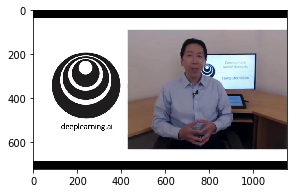

In [39]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(allImg_im1[0])

print(allImg_im1[0].shape)


In [40]:
h, w, d=allImg_im1[0].shape
allImg_trans=np.zeros((min_len, h, w, d)).astype('uint8')
for i in tqdm.tqdm(range(0,min_len)):
    allImg_trans[i]=face_align(allImg_im0[i][128:,:128],allImg_im1[i],face_alignment_obj=fa)


100%|██████████| 1261/1261 [28:34<00:00,  1.36s/it]


In [31]:
def allImg2vid(allImg, output_vid='output_body.mp4', frameRate=30):
    vidCodec = cv2.VideoWriter_fourcc(*'XVID')
    height, width, channel = allImg[0].shape
    vidFile = cv2.VideoWriter(output_vid, vidCodec, frameRate, (width, height))
    for i in tqdm.tqdm(range(0,len(allImg))):
        frame = cv2.cvtColor(allImg[i],cv2.COLOR_RGB2BGR)
        vidFile.write(frame)
    vidFile.release()
    print(" Successfully converted images in allImg to "+output_vid)
    return None

In [32]:
allImg2vid(allImg_trans)

100%|██████████| 1261/1261 [00:08<00:00, 144.52it/s]

 Successfully converted images in allImg to output_body.mp4


In [35]:
!ffmpeg -i output_body.mp4 -i input_videos/CV_01_C4W1L01_000003_to_000045/CV_01_C4W1L01_000003_to_000045_hindi_abhishek_making.mp4 -c copy -map 0:v:0 -map 1:a:0 -shortest out_body.mp4

ffmpeg version 2.8.14-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.9) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e